In [39]:
#импорт необходимых библиотек для нашего исследования
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json
import tensorflow as tf
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.utils import resample
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats


In [40]:
#загрузка датасетов, вывод их изначальной размерности 
dataset_bp = pd.read_excel("/content/X_bp.xlsx")
dataset_nup = pd.read_excel("/content/X_nup.xlsx")

print (dataset_nup.shape)
print (dataset_bp.shape)

(1040, 4)
(1023, 11)


In [41]:
#удаление первого неинформативного столбца в первой таблице
dataset_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
#вывод первых 5 строк первого датасета
dataset_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [42]:
#удаление первого неинформативного столбца во второй таблице
dataset_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
#вывод первых 5 строк первого датасета
dataset_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,4.0,57.0
1,0.0,4.0,60.0
2,0.0,4.0,70.0
3,0.0,5.0,47.0
4,0.0,5.0,57.0


In [43]:
#смотрим размер после удаления лишних столбцов 
print (dataset_nup.shape)
print (dataset_bp.shape)

#вместо 4 и 11 должно получиться 3 и 10

(1040, 3)
(1023, 10)


In [44]:
#объединение по типу INNER
dataset = dataset_bp.merge(dataset_nup, left_index = True, right_index = True, how = 'inner')

In [45]:
#вывод обновленной таблицы и проверка ее нового размера
#из-за раного объема строк в двух таблицах (1023 и 1040) 17 из второго должно выпасть, 
#т.е. остаться должно 1023 строки и 13 столбцов (10+3)
dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [46]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [47]:
dataset.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [48]:
dataset.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [49]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


### **РАЗВЕДКА**

**Вывод для каждой колонки:**
*   среднего значения
*   медианы

**Проверка на:**
*   выбросы
*   пропуски

**Анализ и визуализация предложенных данных:**
*   гистограммы распределения каждой переменной
*   "ящики с усами"
*   попарные графики рассеяния точек







In [50]:
#проверка на пропуски (если их нет, должно отобразиться во всех строках значение "0")
dataset.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [51]:
#проверка на повторения(если их нет, должно отобразиться значение "0")
dataset.duplicated().sum()

0

In [52]:
#выводим средние значения 
dataset.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [53]:
#выводим медиану
dataset.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

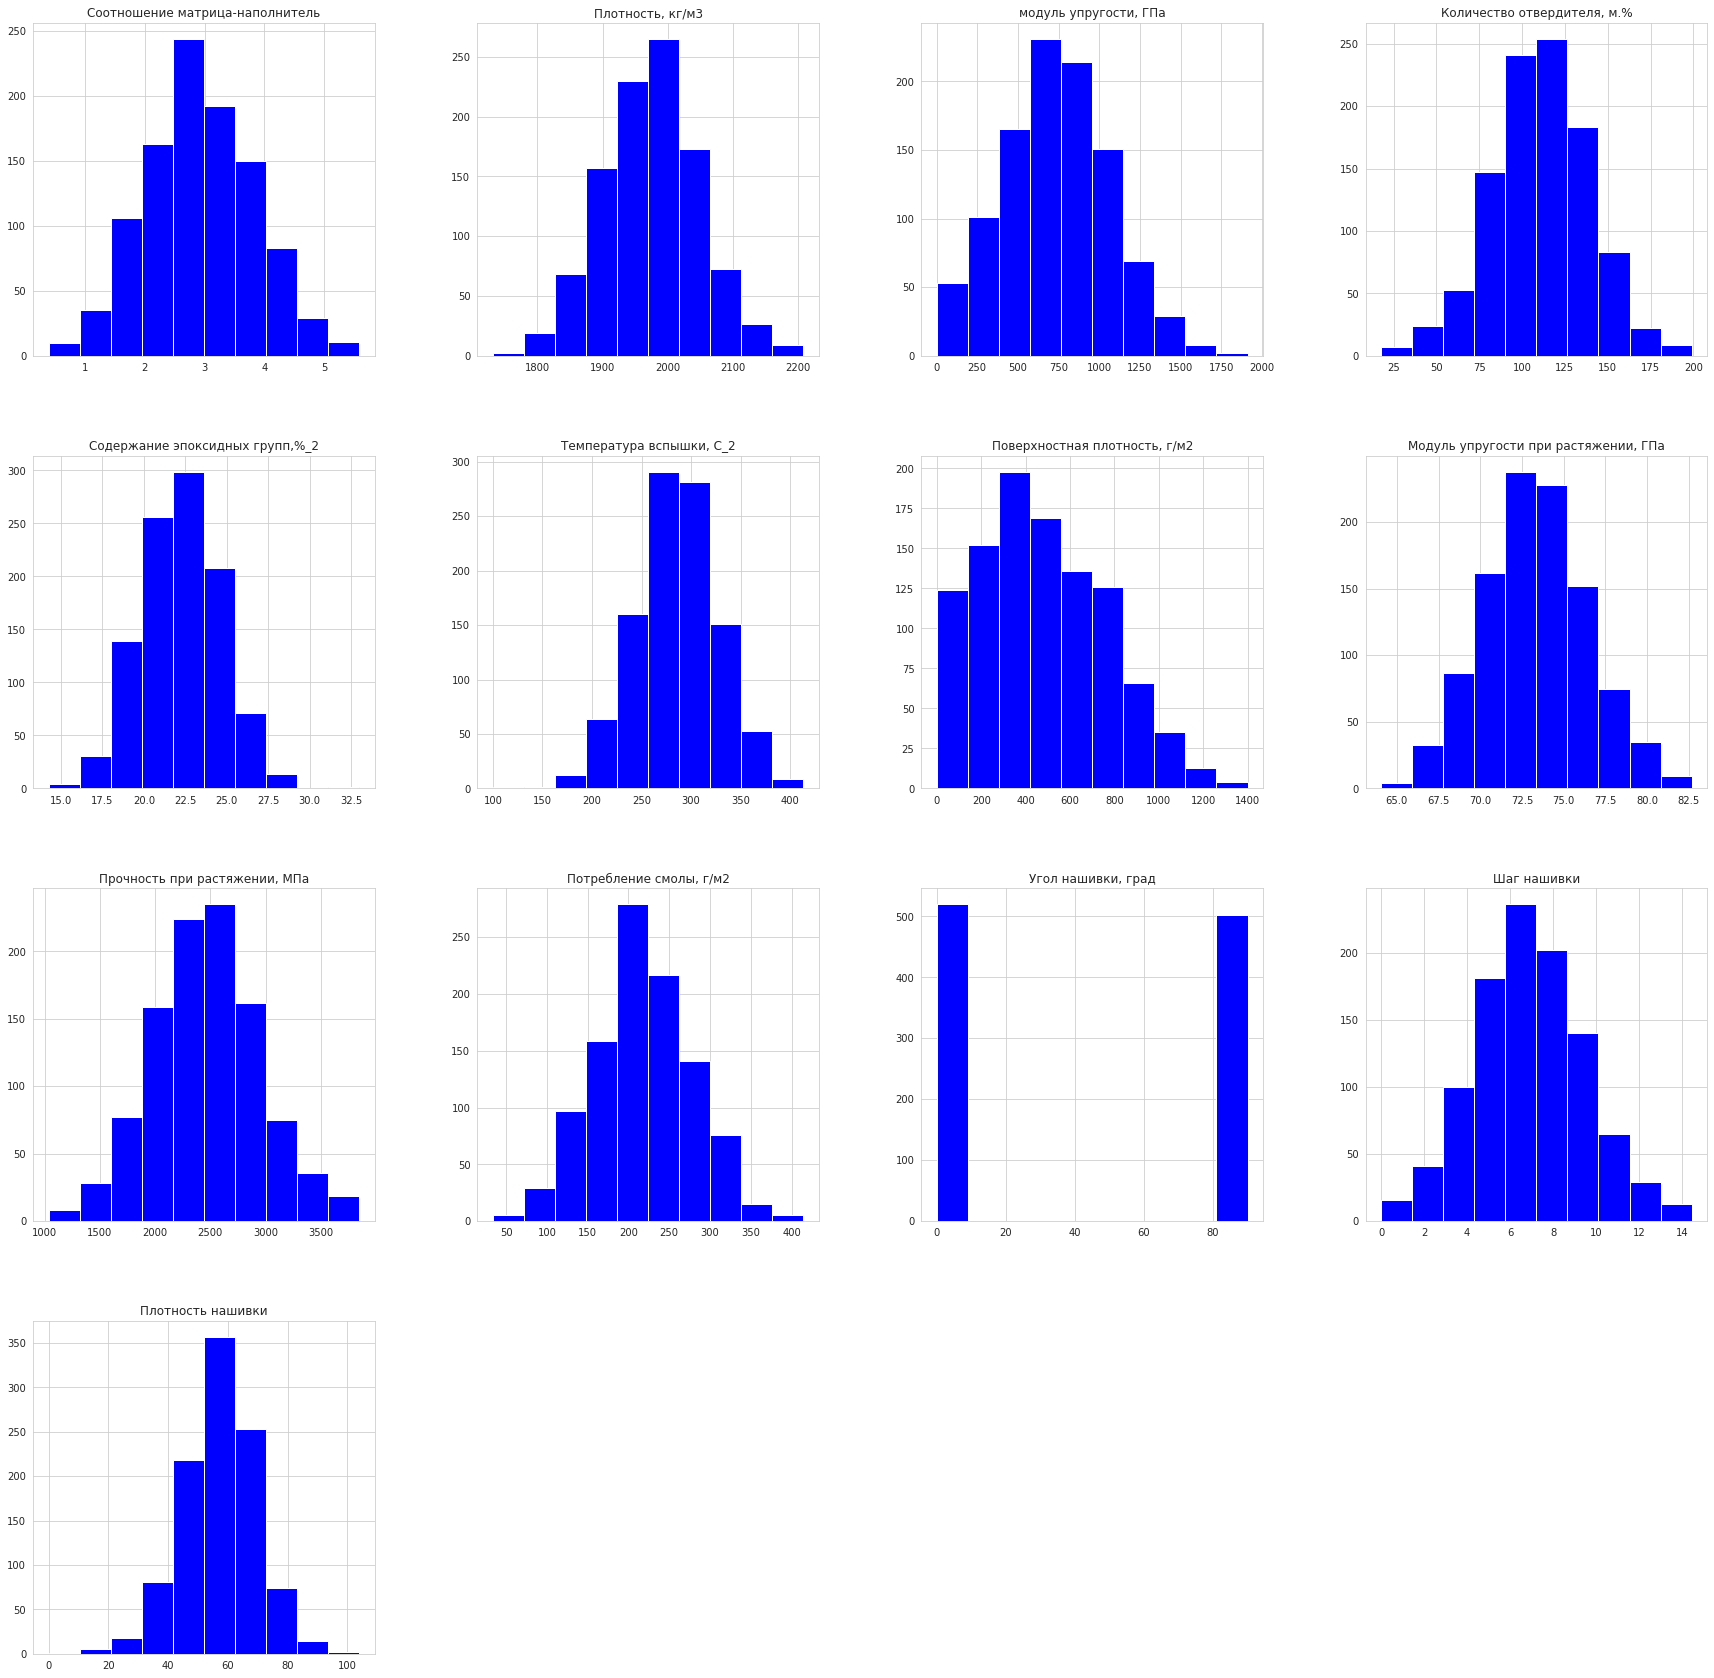

In [54]:
#построение гистограмм распределения каждой из переменных до нормализации 
dataset.hist(figsize = (30,30), color = "b")
plt.show()

In [55]:
#построение "ящиков с усами" каждой из переменных до нормализации 
for column in dataset.columns:
 fig = px.box(dataset,y = column)
 fig.show() 

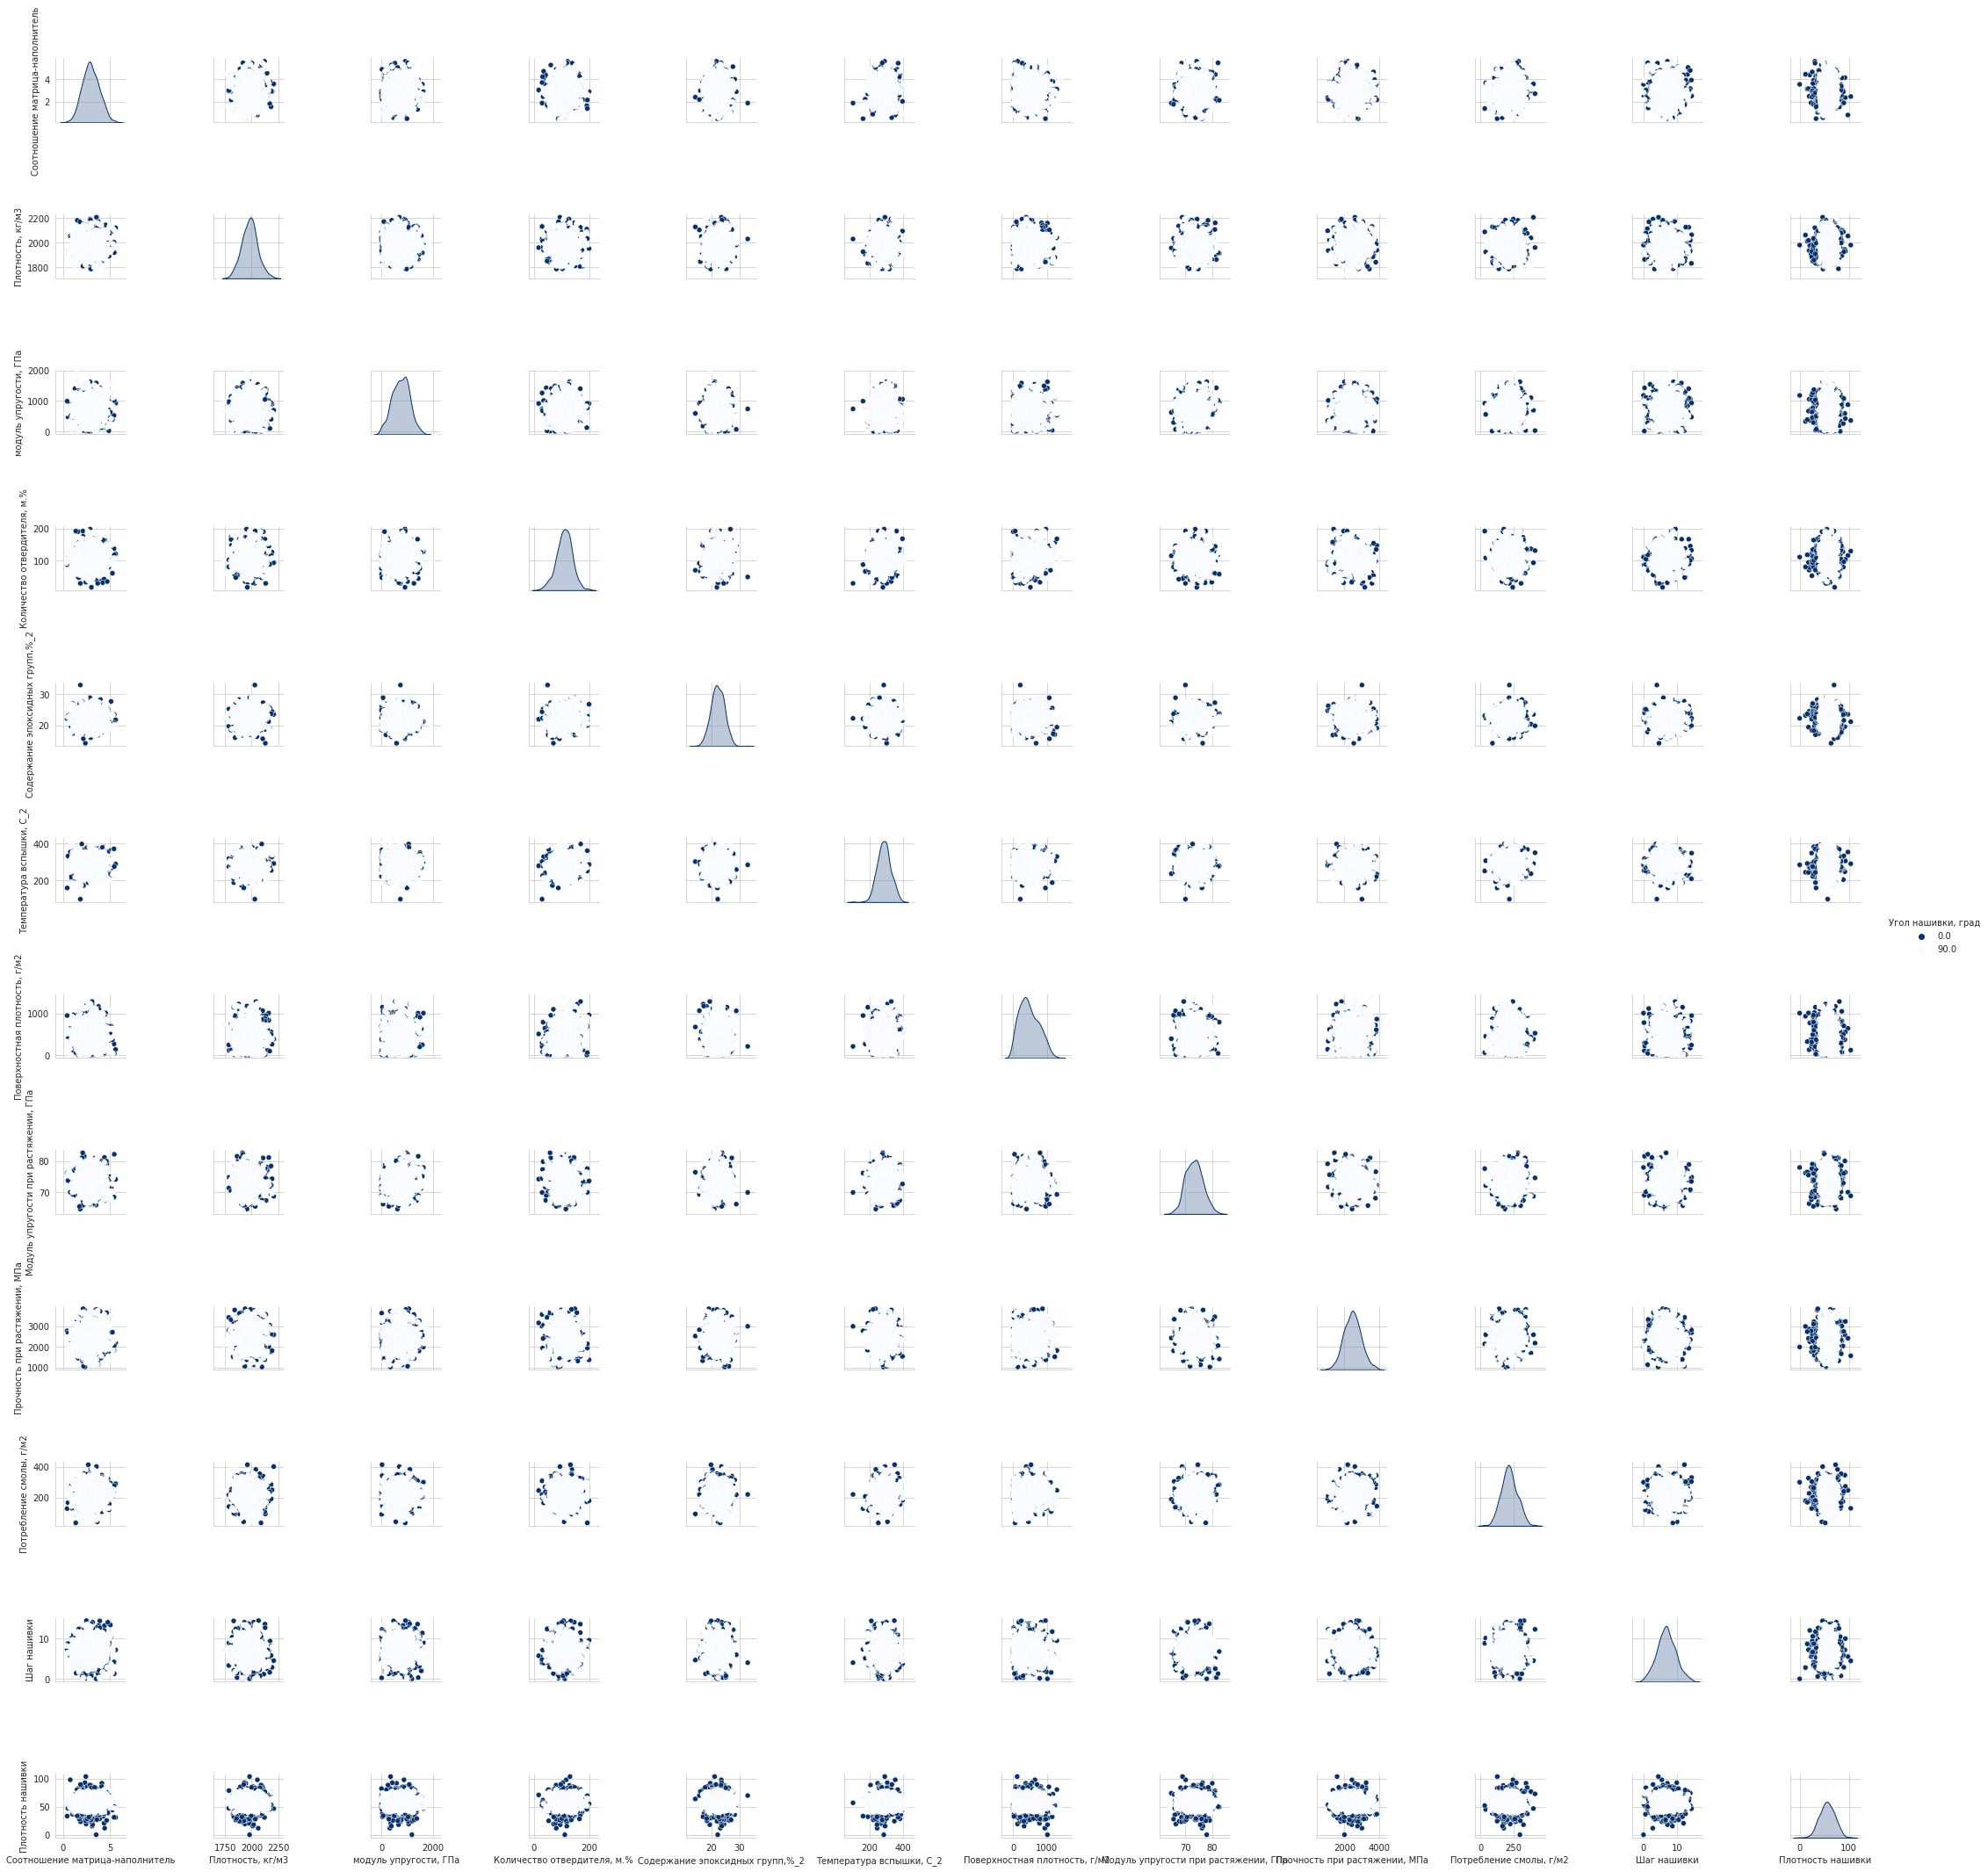

In [56]:
#посторение попарных графиков до нормализации ("Угол нашивки" удаляем, т.к. это категориальный признак)
sns.set_style('whitegrid')
sns.pairplot(dataset, hue = 'Угол нашивки, град', palette='Blues_r')

<Figure size 800x640 with 0 Axes>

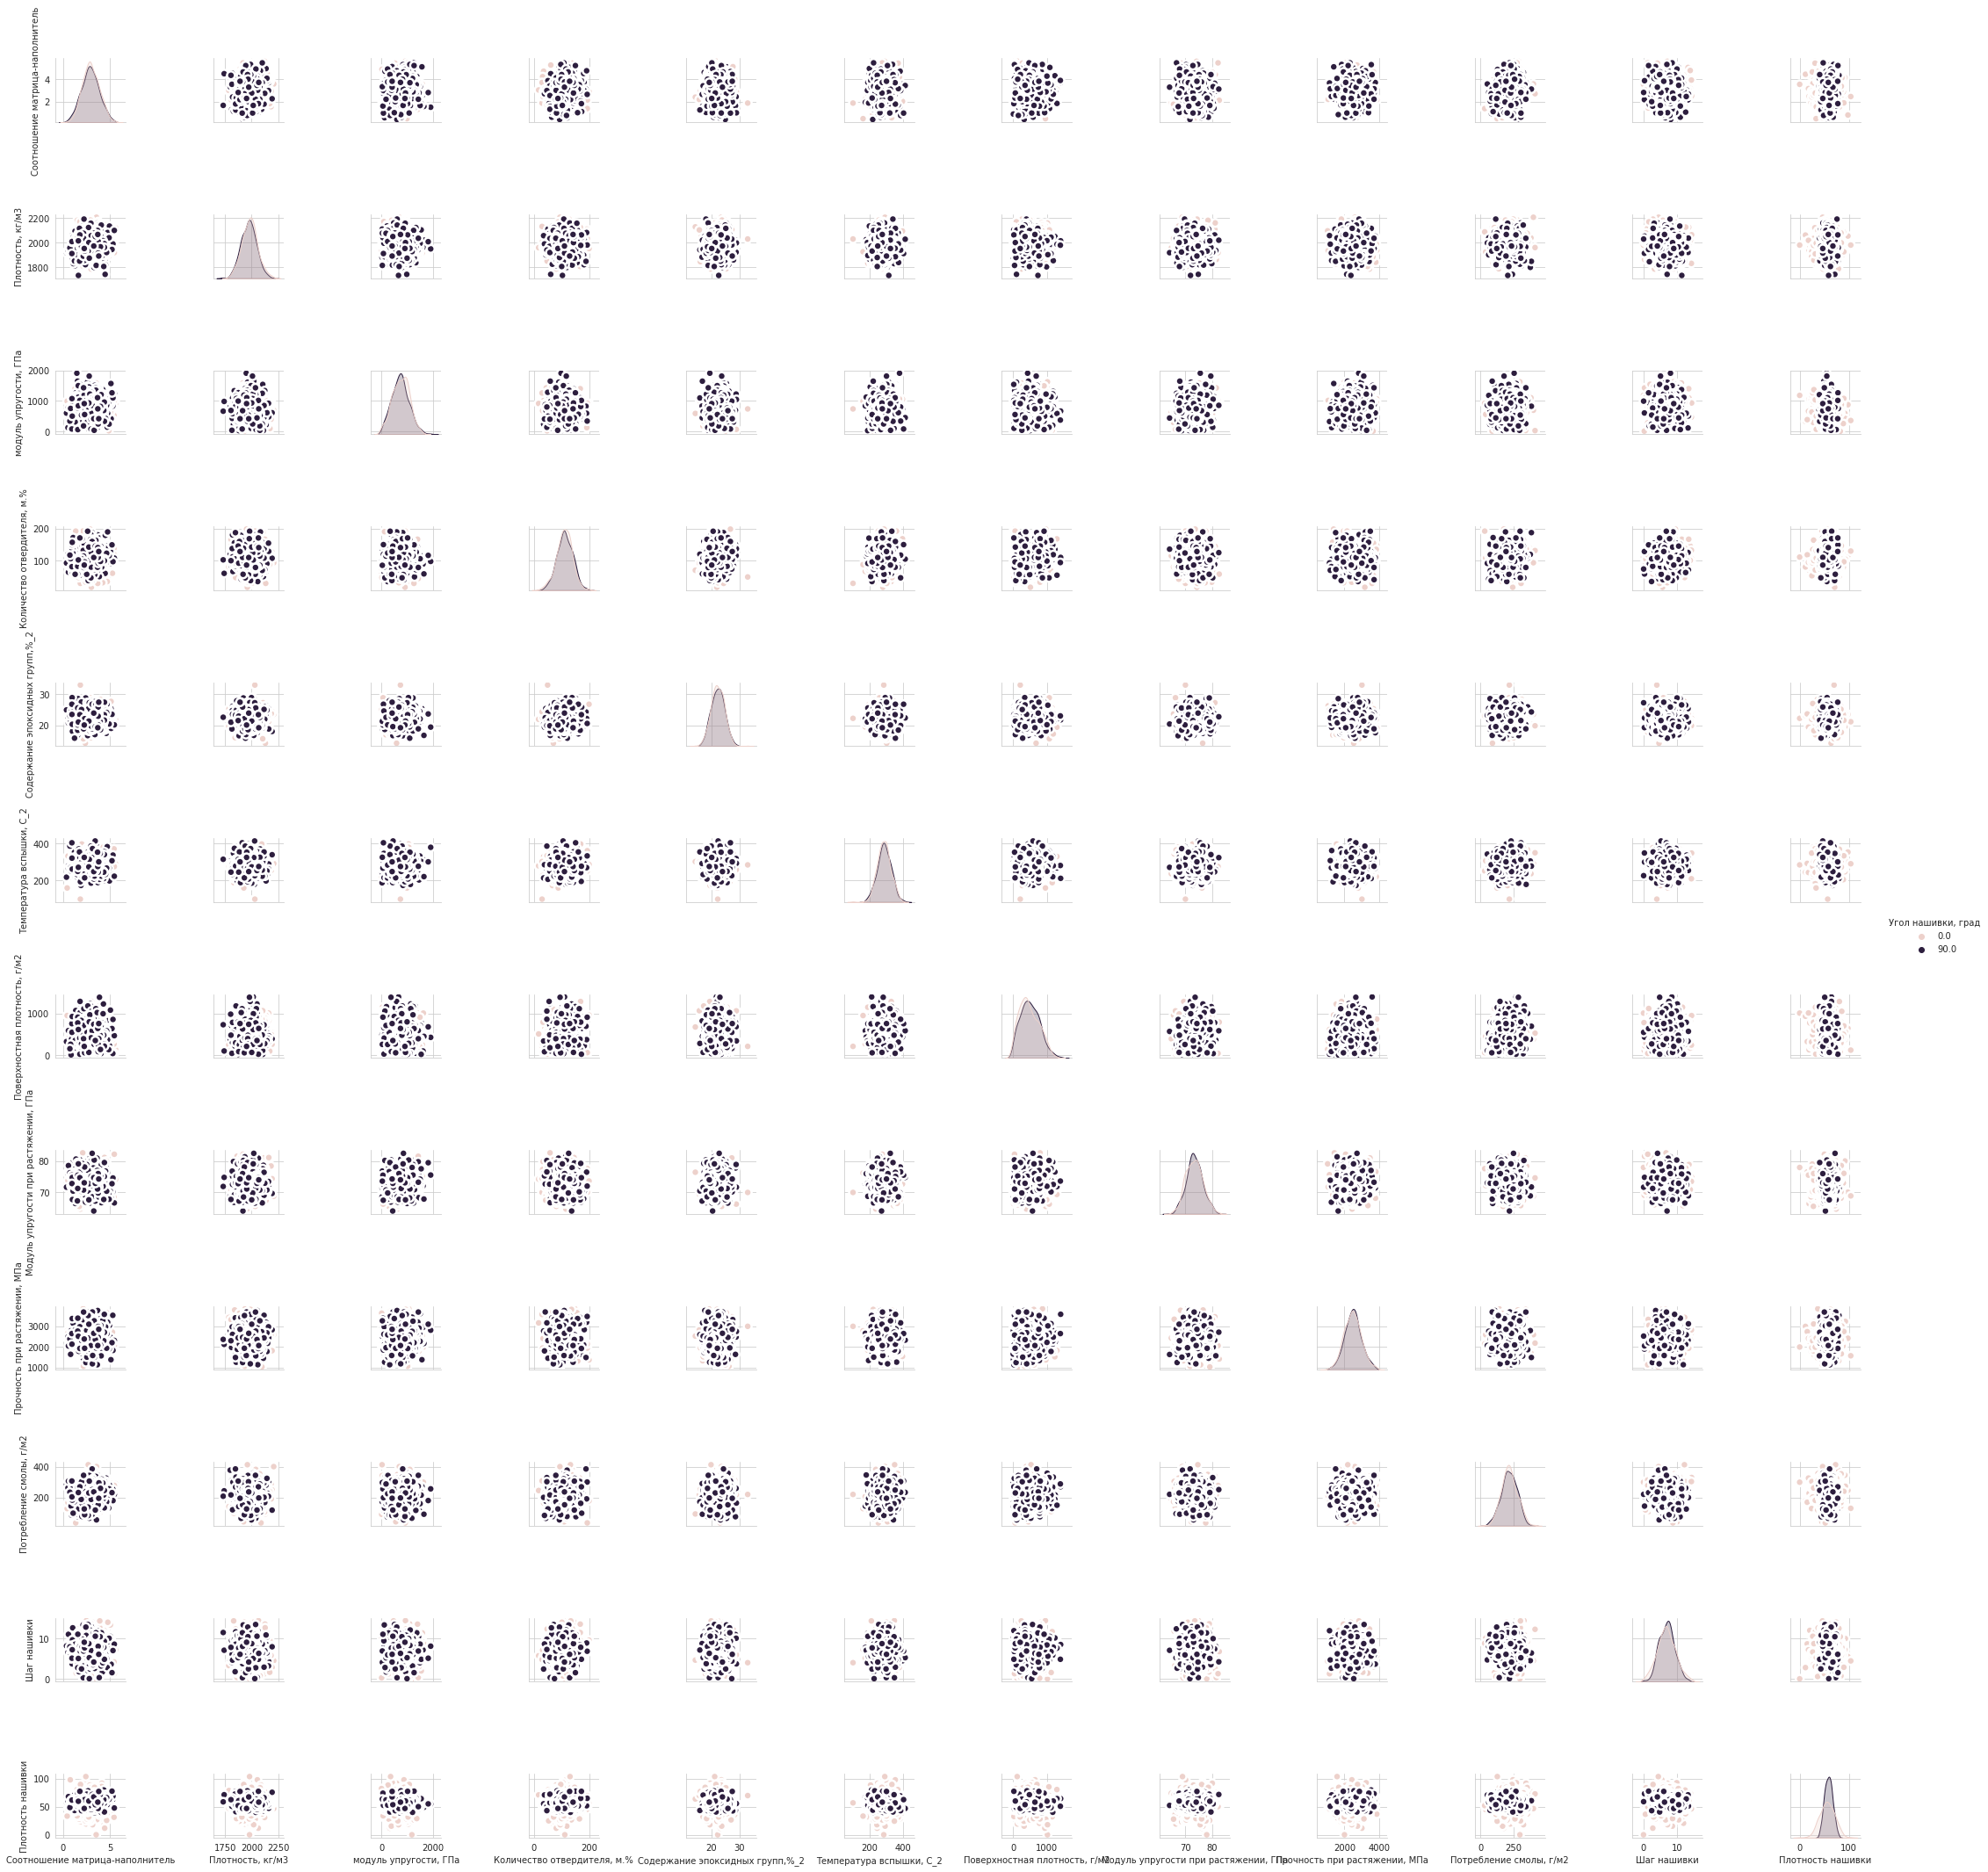

In [57]:
#то же самое, но другим способом
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataset, kind="scatter", hue="Угол нашивки, град", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


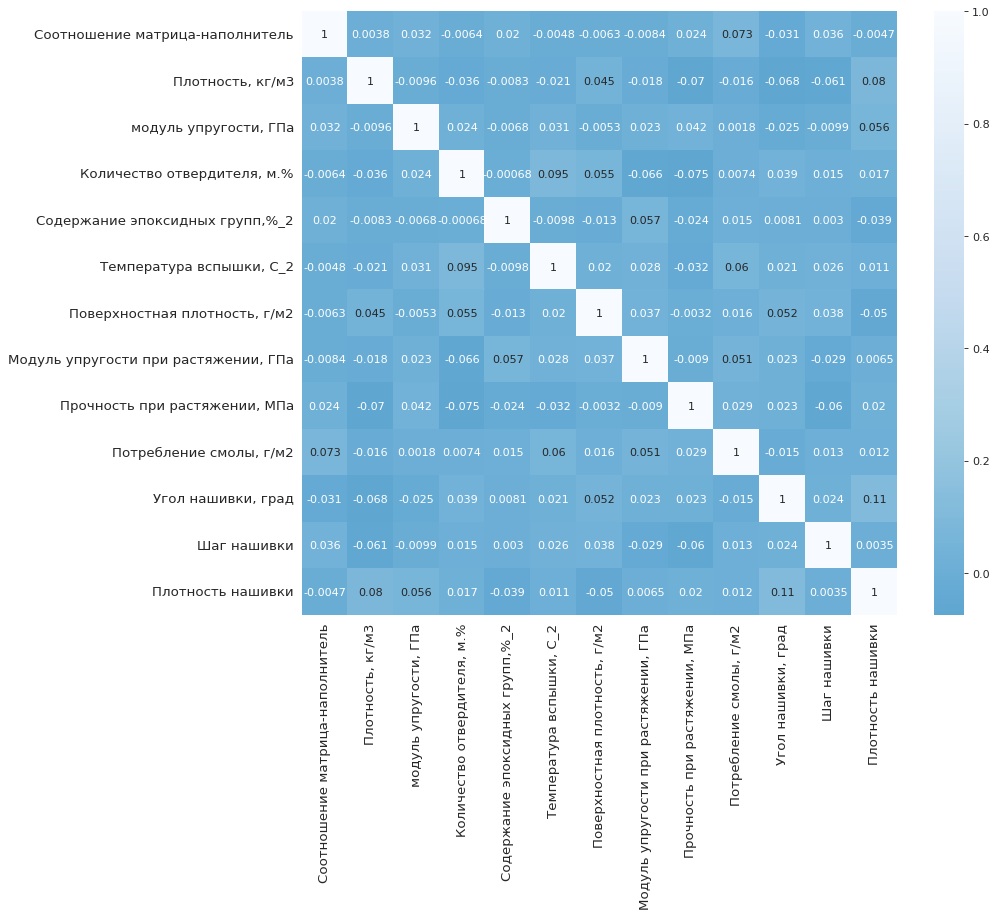

In [58]:
#Тепловая карта
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(dataset.corr(), xticklabels=dataset.corr().columns, yticklabels=dataset.corr().columns, cmap='Blues_r', center=0, annot=True)

#Декораторы
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **НОРМАЛИЗАЦИЯ ДАННЫХ**

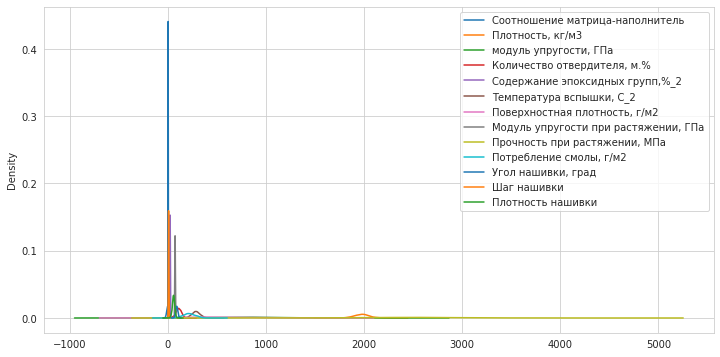

In [59]:
#до MinMaxScaler
fig, ax = plt.subplots(figsize = (12, 6))
dataset.plot(kind = 'kde', ax = ax)

In [60]:
#MinMaxScaler
minmax_scaler = MinMaxScaler()

#обучение нормализатора
dataset_norm = minmax_scaler.fit_transform(np.array(dataset))
dataset_norm[:1]

array([[0.28213084, 0.62653324, 0.38567917, 0.0676537 , 0.42746681,
        0.        , 0.14968224, 0.31919382, 0.69823491, 0.48897856,
        0.        , 0.2769983 , 0.54813542]])

In [61]:
#преобразование в датафрейм; заодно убираем единицы измерения из названий, чтобы столбцы выглядели красивей
dataset_norm_df = pd.DataFrame(data = dataset_norm, columns = ['Соотношение матрица-наполнитель',	'Плотность','Модуль упругости', 'Количество отвердителя', 'Содержание эпоксидных групп', 'Температура вспышки', 'Поверхностная плотность', 'Модуль упругости при растяжении', 'Прочность при растяжении', 'Потребление смолы',	'Угол нашивки', 'Шаг нашивки',	'Плотность нашивки'])
dataset_norm_df.head()

,Соотношение матрица-наполнитель,Плотность,Модуль упругости,Количество отвердителя,Содержание эпоксидных групп,Температура вспышки,Поверхностная плотность,Модуль упругости при растяжении,Прочность при растяжении,Потребление смолы,Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135


In [62]:
dataset_norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,0.488427,0.175541,0.0,0.370696,0.483912,0.608045,1.0
Плотность,1023.0,0.512533,0.154890,0.0,0.404175,0.516497,0.608413,1.0
Модуль упругости,1023.0,0.386301,0.172978,0.0,0.260652,0.386165,0.502528,1.0
Количество отвердителя,1023.0,0.512273,0.156147,0.0,0.412240,0.512240,0.618003,1.0
Содержание эпоксидных групп,1023.0,0.426215,0.128370,0.0,0.338919,0.425487,0.517842,1.0
Температура вспышки,1023.0,0.593354,0.130695,0.0,0.507756,0.593401,0.679924,1.0
Поверхностная плотность,1023.0,0.344638,0.201092,0.0,0.190296,0.322574,0.495105,1.0
Модуль упругости при растяжении,1023.0,0.497880,0.167435,0.0,0.386030,0.494672,0.606751,1.0
Прочность при растяжении,1023.0,0.508634,0.172724,0.0,0.390881,0.506003,0.615432,1.0
Потребление смолы,1023.0,0.484838,0.156875,0.0,0.382955,0.486875,0.587411,1.0


In [63]:
#проверка на пропуски (если их нет, должно отобразиться во всех строках значение "0")
dataset_norm_df.isnull().sum()

Соотношение матрица-наполнитель    0
Плотность                          0
Модуль упругости                   0
Количество отвердителя             0
Содержание эпоксидных групп        0
Температура вспышки                0
Поверхностная плотность            0
Модуль упругости при растяжении    0
Прочность при растяжении           0
Потребление смолы                  0
Угол нашивки                       0
Шаг нашивки                        0
Плотность нашивки                  0
dtype: int64

In [64]:
#проверка на повторения(если их нет, должно отобразиться значение "0")
dataset_norm_df.duplicated().sum()

0

In [66]:
#выводим средние значения 
dataset_norm_df.mean()

Соотношение матрица-наполнитель    0.488427
Плотность                          0.512533
Модуль упругости                   0.386301
Количество отвердителя             0.512273
Содержание эпоксидных групп        0.426215
Температура вспышки                0.593354
Поверхностная плотность            0.344638
Модуль упругости при растяжении    0.497880
Прочность при растяжении           0.508634
Потребление смолы                  0.484838
Угол нашивки                       0.491691
Шаг нашивки                        0.477768
Плотность нашивки                  0.549616
dtype: float64

In [67]:
#выводим медиану
dataset_norm_df.median()

Соотношение матрица-наполнитель    0.483912
Плотность                          0.516497
Модуль упругости                   0.386165
Количество отвердителя             0.512240
Содержание эпоксидных групп        0.425487
Температура вспышки                0.593401
Поверхностная плотность            0.322574
Модуль упругости при растяжении    0.494672
Прочность при растяжении           0.506003
Потребление смолы                  0.486875
Угол нашивки                       0.000000
Шаг нашивки                        0.478940
Плотность нашивки                  0.551423
dtype: float64

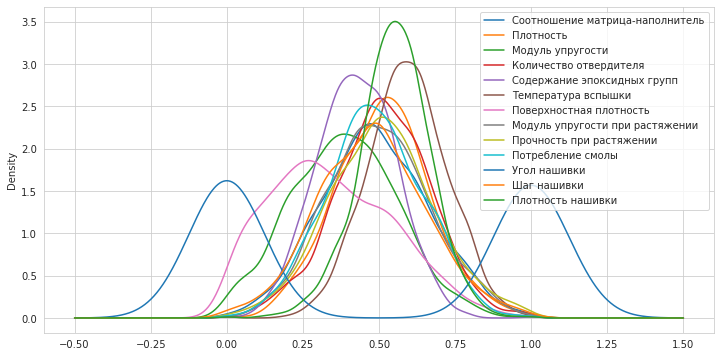

In [68]:
fig, ax = plt.subplots(figsize = (12, 6))
dataset_norm_df.plot(kind = 'kde', ax = ax)

## **ПЕРЕМЕННЫЕ, ВЫБОРКИ**

## 1. Модели для прочности при растяжении 

In [69]:
x = dataset_norm_df.iloc [:,dataset_norm_df.columns != 'Прочность при растяжении']
x

,Соотношение матрица-наполнитель,Плотность,Модуль упругости,Количество отвердителя,Содержание эпоксидных групп,Температура вспышки,Поверхностная плотность,Модуль упругости при растяжении,Потребление смолы,Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.488979,0.0,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.239516,1.0,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.220404,1.0,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.532590,1.0,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.428909,1.0,0.437186,0.560262


In [70]:
x = np.array (x)
x

array([[0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.54813542],
       [0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.57698465],
       [0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.67314876],
       ...,
       [0.55575038, 0.50547008, 0.21706548, ..., 1.        , 0.28815814,
        0.65035483],
       [0.63739572, 0.70384225, 0.38711371, ..., 1.        , 0.43718647,
        0.56026242],
       [0.65713085, 0.33328967, 0.21731676, ..., 1.        , 0.42096135,
        0.74464166]])

In [71]:
y =  dataset_norm_df ['Прочность при растяжении']
y

0       0.698235
1       0.698235
2       0.698235
3       0.698235
4       0.698235
          ...   
1018    0.480312
1019    0.470745
1020    0.578340
1021    0.368070
1022    0.647135
Name: Прочность при растяжении, Length: 1023, dtype: float64

In [72]:
y = np.array (y)
y

array([0.69823491, 0.69823491, 0.69823491, ..., 0.57834007, 0.36807034,
       0.64713515])

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
       

In [75]:
x_train.shape

(716, 12)

In [76]:
x_test.shape

(307, 12)

In [77]:
y_train.shape

(716,)

In [78]:
y_test.shape

(307,)

## **ЛИНЕЙНАЯ РЕГРЕССИЯ**

In [79]:
lr = LinearRegression()

#обучим нашу модель
lr.fit(x_train, y_train)

LinearRegression()

In [80]:
#предсказание прочности при растяжении(y) на основе нескольких независимых переменных (Х) 
y_pred = lr.predict(x_test)
 
#вывод первые пять значений с помощью диапазона индексов
print(y_pred[:5])

[0.51638502 0.5079644  0.50536213 0.5334997  0.51907013]


In [81]:
#вывод корня среднеквадратической ошибки
#сравнение тестовых и прогнозных значений прочности при растяжении
MSE = metrics.mean_squared_error(y_test, y_pred)
print (MSE)


0.028208863778752036


In [82]:
#расчет нового критерия качества — коэффициента детерминации (R2 или R-квадрат), 
#который показывает, какая доля изменчивости целевой переменной объясняется с помощью использованной модели
R2 = metrics.r2_score(y_test, y_pred)
print(R2)

0.004230422816883017


## **БЛИЖАЙШИЕ СОСЕДИ**

In [83]:
kn = KNeighborsRegressor()
grid = {'n_neighbors' : range(1, 101, 1), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

gsc = GridSearchCV(kn, grid, n_jobs=-1, cv=10,verbose = 1)
gsc.fit(x_train, y_train)
kn = gsc.best_estimator_

MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [84]:
gsc.best_estimator_

KNeighborsRegressor(n_neighbors=99)

In [85]:
print (MSE)

0.028208863778752036


In [86]:
print (R2)

0.004230422816883017


## **РЕШАЮЩЕЕ ДЕРЕВО**

In [87]:
values = dataset_norm_df.values
#bootstrap 
n_iterations = 1
n_size = int(len(dataset_norm_df) * 0.5)
#запуск алгоритма
stats = []
for i in range(n_iterations):
  train = resample (values, n_samples=n_size)
  test = np.array([x for x in values if x.tolist() not in train.tolist()])
  #обучение модели
  #используется не DecisionTreeClassifier, потому что нужно дерево для регрессии, не для классификации
  dt = DecisionTreeRegressor()
  dt.fit (train[:, :-1], train [:,-1])
  #прогноз значений
  predict = dt.predict (test[:, :-1])
  score = mean_squared_error(test[:,-1], predict)
  
  stats.append (score)
print (stats)


[0.03323962360704601]


In [88]:
R2 = r2_score (test[:,-1], predict)
R2

-1.488436052583686

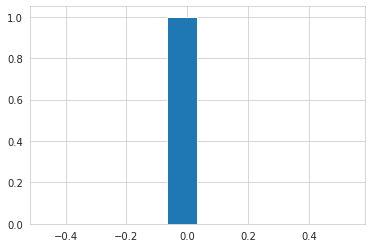

95.0 3.3239623607046007 3.3239623607046007


In [89]:
 #гистограмма точности
 plt.hist(stats)
 plt.show()

 #доверительный интервал
 alpha = 0.95
 p = ((1-alpha)/2)*100
 lower = max (0.0, np.percentile (stats, p))

 p = (alpha +((1-alpha)/2))*100

 upper = min (1, np.percentile (stats, p))

 print (alpha*100, lower*100, upper*100)

In [90]:
#или
np.random.seed(42)
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

dt = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,cv=10, verbose = True) 
grid_search.fit(x_train, y_train)  
best_dec_tree = grid_search.best_estimator_  

score = mean_squared_error(y_test, best_dec_tree.predict (x_test))
print ("MSE:", score)


Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
MSE: 0.028470633138137295


In [91]:
R2=r2_score(y_test, best_dec_tree.predict (x_test))
R2

-0.005010004814622437

[Text(0.6, 0.875, 'Содержание эпоксидных групп <= 0.501\nfriedman_mse = 0.03\nsamples = 716\nvalue = 0.508'),
 Text(0.4, 0.625, 'Модуль упругости <= 0.283\nfriedman_mse = 0.03\nsamples = 519\nvalue = 0.516'),
 Text(0.2, 0.375, 'friedman_mse = 0.03\nsamples = 151\nvalue = 0.491'),
 Text(0.6, 0.375, 'Плотность <= 0.519\nfriedman_mse = 0.029\nsamples = 368\nvalue = 0.526'),
 Text(0.4, 0.125, 'friedman_mse = 0.03\nsamples = 191\nvalue = 0.541'),
 Text(0.8, 0.125, 'friedman_mse = 0.029\nsamples = 177\nvalue = 0.509'),
 Text(0.8, 0.625, 'friedman_mse = 0.031\nsamples = 197\nvalue = 0.487')]

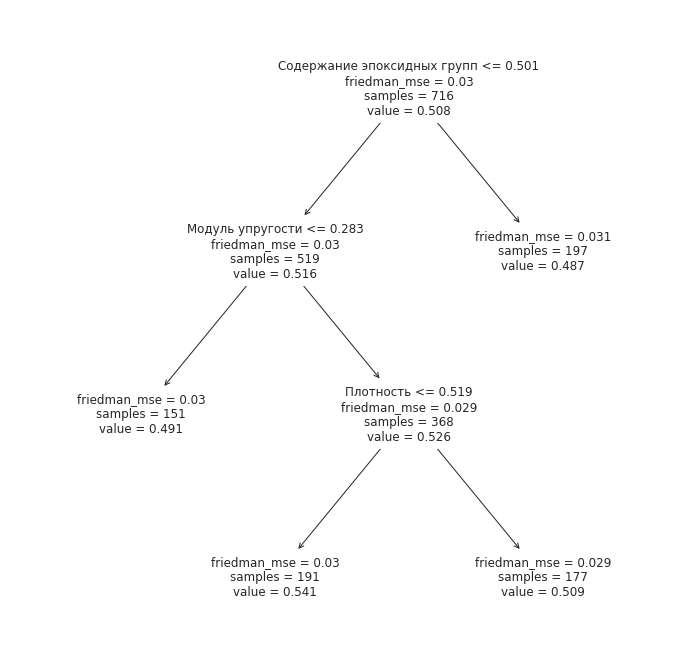

In [92]:
plt.figure (figsize = (12,12))
from sklearn import tree
tree.plot_tree(best_dec_tree, feature_names = dataset_norm_df.columns)

## 2. Модели для модуля упругости при растяжении

In [93]:
x = np.array (x)
x

array([[0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.54813542],
       [0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.57698465],
       [0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.67314876],
       ...,
       [0.55575038, 0.50547008, 0.21706548, ..., 1.        , 0.28815814,
        0.65035483],
       [0.63739572, 0.70384225, 0.38711371, ..., 1.        , 0.43718647,
        0.56026242],
       [0.65713085, 0.33328967, 0.21731676, ..., 1.        , 0.42096135,
        0.74464166]])

In [94]:
y =  dataset_norm_df ['Модуль упругости при растяжении']
y

0       0.319194
1       0.319194
2       0.319194
3       0.319194
4       0.319194
          ...   
1018    0.485125
1019    0.475992
1020    0.573346
1021    0.536217
1022    0.550550
Name: Модуль упругости при растяжении, Length: 1023, dtype: float64

In [95]:
y = np.array (y)
y

array([0.31919382, 0.31919382, 0.31919382, ..., 0.57334596, 0.53621714,
       0.55055018])

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [97]:
x_train.shape

(716, 12)

In [98]:
x_test.shape

(307, 12)

In [99]:
y_train.shape

(716,)

In [100]:
y_test.shape

(307,)

In [101]:
#Линейная регрессия

lr2 = LinearRegression()
lr2.fit(x_train, y_train)

y_pred = lr2.predict(x_test)
print(y_pred[:5])
MSE = metrics.mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
R2 = metrics.r2_score(y_test, y_pred)
print('R2:', R2)

[0.70467849 0.70416339 0.52264147 0.37006305 0.46388031]
MSE: 3.5310902339377382e-31
R2: 1.0


In [102]:
#Ближайшие соседи

kn2 = KNeighborsRegressor()
grid = {'n_neighbors' : range(1, 101, 1), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

gsc = GridSearchCV (kn2, grid, n_jobs=-1, cv=10,verbose = 1)
gsc.fit(x_train,  y_train)
kn2 = gsc.best_estimator_

MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
gsc.best_estimator_
print('MSE:', MSE)
print('R2:', R2)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
MSE: 3.5310902339377382e-31
R2: 1.0


In [103]:
from scipy.spatial import delaunay_plot_2d
#Решающее дерево

values = dataset_norm_df.values
#bootstrap 
n_iterations = 1
n_size = int(len(dataset_norm_df) * 0.5)
#запуск алгоритма
stats = []
for i in range(n_iterations):
  train = resample (values, n_samples=n_size)
  test = np.array([x for x in values if x.tolist() not in train.tolist()])
  #обучение модели
  #используется не DecisionTreeClassifier, потому что нужно дерево для регрессии, не для классификации
  dt2 = DecisionTreeRegressor()
  dt2.fit (train[:, :-1], train [:,-1])
  #прогноз значений
  predict = dt2.predict (test[:, :-1])
  #score = accuracy_score (test[:,-1], predict)
  score = mean_squared_error(test[:,-1], predict)
  
  stats.append (score)
print (stats)

[0.026226993827320935]


In [104]:
R2 = r2_score (test[:,-1], predict)
R2

-0.8999057043334238

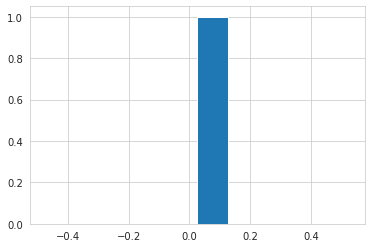

95.0 2.6226993827320935 2.6226993827320935


In [105]:
 #гистограмма точности
 plt.hist(stats)
 plt.show()

 #доверительный интервал
 alpha = 0.95
 p = ((1-alpha)/2)*100
 lower = max (0.0, np.percentile (stats, p))

 p = (alpha +((1-alpha)/2))*100

 upper = min (1, np.percentile (stats, p))

 print (alpha*100, lower*100, upper*100)

In [106]:
#или
np.random.seed(42)
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
               
dt2 = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt2, param_grid=param_grid,cv=10, verbose = True) 
grid_search.fit(x_train, y_train)  
best_dec_tree = grid_search.best_estimator_  

score = mean_squared_error(y_test, best_dec_tree.predict (x_test))
print ("MSE:", score)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
MSE: 0.002268699766192818


In [107]:
R2 = r2_score (y_test, best_dec_tree.predict (x_test))
R2

0.9207559947003582

[Text(0.7142857142857143, 0.9166666666666666, 'Модуль упругости при растяжении <= 0.67\npoisson = 0.029\nsamples = 716\nvalue = 0.491'),
 Text(0.5714285714285714, 0.75, 'Модуль упругости при растяжении <= 0.585\npoisson = 0.021\nsamples = 616\nvalue = 0.447'),
 Text(0.42857142857142855, 0.5833333333333334, 'Модуль упругости при растяжении <= 0.52\npoisson = 0.018\nsamples = 516\nvalue = 0.413'),
 Text(0.2857142857142857, 0.4166666666666667, 'Модуль упругости при растяжении <= 0.307\npoisson = 0.015\nsamples = 416\nvalue = 0.379'),
 Text(0.14285714285714285, 0.25, 'poisson = 0.009\nsamples = 100\nvalue = 0.234'),
 Text(0.42857142857142855, 0.25, 'Модуль упругости при растяжении <= 0.463\npoisson = 0.004\nsamples = 316\nvalue = 0.425'),
 Text(0.2857142857142857, 0.08333333333333333, 'poisson = 0.003\nsamples = 216\nvalue = 0.394'),
 Text(0.5714285714285714, 0.08333333333333333, 'poisson = 0.0\nsamples = 100\nvalue = 0.491'),
 Text(0.5714285714285714, 0.4166666666666667, 'poisson = 0.0\ns

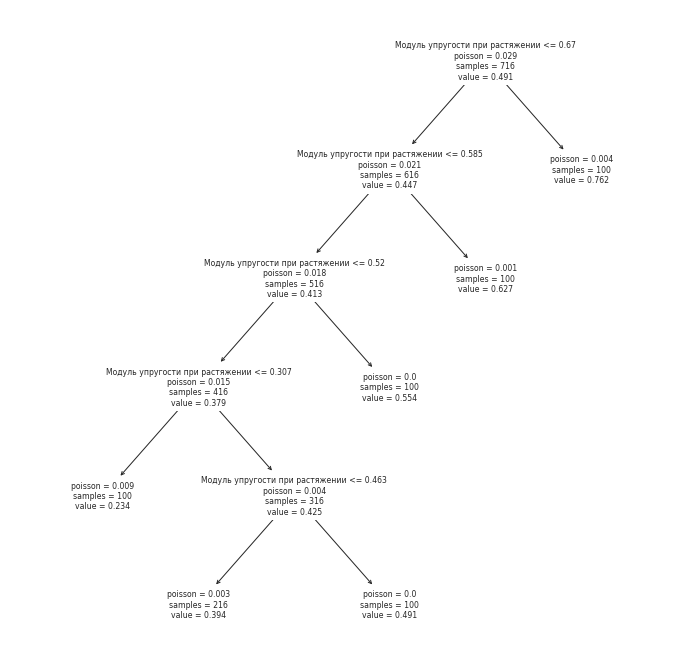

In [108]:
plt.figure (figsize = (12,12))
from sklearn import tree
tree.plot_tree(best_dec_tree, feature_names = dataset_norm_df.columns)

## **НЕЙРОСЕТЬ ДЛЯ СООТНОШЕНИЯ "МАТРИЦА-НАПОЛНИТЕЛЬ"**

In [116]:
y = dataset_norm_df['Соотношение матрица-наполнитель']
x = dataset_norm_df.drop(['Соотношение матрица-наполнитель'], axis = 1)
x_train, x_test, y_train,y_test = train_test_split(x, y , test_size=0.3, random_state=42)

In [117]:
y.shape,x.shape

((1023,), (1023, 12))

In [118]:
ns = Sequential()
ns.add(layers.Dense(50, input_dim=12, activation='relu'))
ns.add(layers.Dense(128, activation='relu'))
ns.add(layers.Dense(128, activation='relu'))
ns.add(layers.Dense(64, activation='relu'))
ns.add(layers.Dense(32, activation='softmax'))
ns.add(layers.Dense(1))
ns.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                650       
                                                                 
 dense_7 (Dense)             (None, 128)               6528      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 34,059
Trainable params: 34,059
Non-trai

In [119]:
dfmodel = ns.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = ns.fit(x_train,y_train,validation_split=0.2,verbose=1, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 0.1279 - mae: 0.3143 - val_loss: 0.0660 - val_mae: 0.2133
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0497 - mae: 0.1801 - val_loss: 0.0310 - val_mae: 0.1394
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0318 - mae: 0.1410 - val_loss: 0.0298 - val_mae: 0.1363
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0308 - mae: 0.1387 - val_loss: 0.0297 - val_mae: 0.1367
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0306 - mae: 0.1384 - val_loss: 0.0298 - val_mae: 0.1374
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0305 - mae: 0.1384 - val_loss: 0.0298 - val_mae: 0.1376
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0305 - mae: 0.1384 - val_loss: 0.0298 - val_mae: 0.1375
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0305 - 

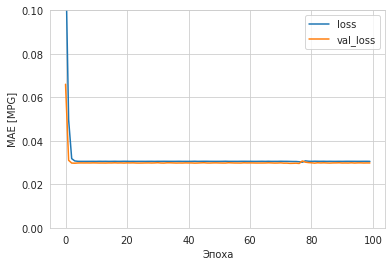

In [120]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.1])
    plt.xlabel('Эпоха')

    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss (history)

In [121]:
ns.evaluate(x_test, y_test, verbose=1)

10/10 [==============================] - 0s 5ms/step - loss: 0.0317 - mae: 0.1446


[0.03168300911784172, 0.14462889730930328]

In [123]:
MSE = mean_squared_error(y_test, ns.predict(x_test))
R2 = r2_score(y_test, ns.predict(x_test))
print (MSE)
print (R2)

10/10 [==============================] - 0s 10ms/step
0.03168300828705616
-0.00039930547597832877


## **ПРИЛОЖЕНИЕ**

In [124]:
import pickle 

In [125]:
#сохранение модели
pickle.dump (lr, open ('lr_model.pkl', 'wb'))

In [126]:
model_load = pickle.load(open('lr_model.pkl', 'rb'))

In [127]:
model_load.predict (x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



array([0.557921  , 0.52069465, 0.56237806, 0.50351471, 0.56088373,
       0.55623206, 0.52815506, 0.5573131 , 0.48504444, 0.54051611,
       0.51598296, 0.5962732 , 0.49457117, 0.55102858, 0.50832815,
       0.51607591, 0.5317226 , 0.53466934, 0.58273096, 0.49949002,
       0.54846379, 0.54457115, 0.51571088, 0.5293381 , 0.53824613,
       0.5635649 , 0.54677947, 0.54647868, 0.57712041, 0.53237156,
       0.58068976, 0.5559848 , 0.52682125, 0.53078343, 0.57175581,
       0.55565608, 0.56531959, 0.53451853, 0.53439621, 0.5230616 ,
       0.49887449, 0.5124359 , 0.52907415, 0.54327829, 0.56237562,
       0.55730802, 0.52627484, 0.57010143, 0.54160576, 0.56616288,
       0.52769824, 0.58497153, 0.55694529, 0.4982449 , 0.57229068,
       0.57284238, 0.55345758, 0.48280023, 0.50586845, 0.53472677,
       0.55076699, 0.55792942, 0.51551733, 0.56540141, 0.5108154 ,
       0.55447279, 0.54049022, 0.56778421, 0.56476039, 0.56474087,
       0.54304143, 0.50822436, 0.55347697, 0.52822936, 0.54253

In [ ]:
import flask
from flask import render_template
import pickle
import sklearn
app = flask>flask(__name__, template_folder = 'templates')
@app.route ('/', methods = ['POST', 'GET'])
@app.route ('/index', methods = ['POST', 'GET'])
def main():
    if flask.request.method == 'GET':
        return render_template ('main.html')
    if flask.request.method == 'POST':
        with open ('lr_model.pkl', 'rb') as f:
            loaded_model = pickle.load(f)
        y = float (flask.request.form ['Прочность при растяжении'])
        y_pred = loaded_model.predict([[y]])
        return render_template('main.html', result = y_pred)